In [1]:
from simple_exact_diagonalization_routines.local_matrix_class import *
from scipy.linalg import expm
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [7]:
# System size
L = 4

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)

# Not used
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
H_TFIM = 0*np.eye( 2**L ) 

# H = X1X2 + X2X3 + Z1 + Z2 + Z3
for x in range(L-1):
    H_TFIM = H_TFIM + X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)
H_TFIM = H_TFIM + Z.at(L)    
hamiltonian_name = "TFIM_L_" +str(L)   

In [12]:
from class_double_bracket_flow import *

# Initialize class with Hamiltonian
flow = double_bracket_flow( H_TFIM )

flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['onsite_Z_coupling'] = np.asarray([1,1,1])

# Debugging tests

## Test 1: Flow generator commutation
flow.choose_flow_generator()returns [B,H]. Correct.

In [8]:
# Helper functions for testing
pauli = {
    0: qeye(2),
    1: sigmax(),
    2: sigmay(),
    3: sigmaz()
         }

def tensor_out(tup):
    return tensor(pauli[tup[0]],pauli[tup[1]],pauli[tup[2]])

In [9]:
B = 2*tensor_out((3,0,0)) + tensor_out((0,3,0)) + tensor_out((0,0,3))
H = tensor_out((1,1,0)) + tensor_out((0,1,1)) + B

commutator(B,H)
# print(B)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.  4.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  4.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.]
 [-6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  0.  0. -4.  0.  0.  0.]]

In [10]:
flow.flow_generator['onsite_Z_coupling'] = [2,1,1]
Z = Z_class(flow.L)
Z_list = [Z.at(i+1) for i in range(flow.L)]
## ?? The numpy way?
B_field = sum([flow.flow_generator['onsite_Z_coupling'][i] * Z_list[i] for i in range (flow.L)])
chosen_generator = double_bracket_flow.commutator( B_field, H_TFIM ) 
print(chosen_generator)
# print(B_field)

[[ 0.  0.  0.  4.  0.  0.  6.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.]
 [ 0.  0.  0.  0.  2.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  4.]
 [ 0.  0.  0. -2.  0.  0.  0.  0.]
 [-6.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -6.  0.  0. -4.  0.  0.  0.]]


## Test 2: Gradient

In [11]:
# Issue 1: gradient changing when running multiple times
dB_custom = 0.001
print(flow.find_onsite_Z_coupling_gradient(s=0.1, B=[3,1,1], dB = dB_custom))
print(flow.find_onsite_Z_coupling_gradient(s=0.1, B=[1,1,1], dB = dB_custom))

[ 0.40170079 -0.36461885 -0.84005332]
[-0.40759315  0.81715093 -0.40759315]


## Test 3: Flow sigma decreasing

In [31]:
flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True
flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['onsite_Z_coupling'] = np.asarray([1,1,0])
flow.nmb_flow_steps = 18
flow.magnetic_step_min = 0
flow.magnetic_step_max = 1
flow.nmb_search_points_magnetic_b_search = 9

flow.flow_step_min = 0
flow.flow_step_max = 1.0
flow.nmb_search_points_minimizing_s_search = 15
flow.flow_via_onsite_Z_potential_search()

Flow step  0 using H with norm 6.324555320336759
    Found minimum norm =  3.030003153943035  for s =  0.07142857142857142
Flow step  1 using H with norm 6.324555320336759
Flowing with gradient [ 0.54213051 -0.54181306 -0.6422874 ]
 db = 0.0 , B = [0.70710678 0.70710678 0.        ]
    Found minimum norm =  3.030003153943035  for s =  0.07142857142857142
 db = 0.125 , B = [0.63934047 0.77483341 0.08028593]
    Found minimum norm =  2.9661449277966137  for s =  0.07142857142857142
 db = 0.25 , B = [0.57157415 0.84256005 0.16057185]
    Found minimum norm =  2.9188218484488258  for s =  0.07142857142857142
 db = 0.375 , B = [0.50380784 0.91028668 0.24085778]
    Found minimum norm =  2.8875483201676153  for s =  0.07142857142857142
 db = 0.5 , B = [0.43604152 0.97801331 0.3211437 ]
    Found minimum norm =  2.8703854689809685  for s =  0.07142857142857142
 db = 0.625 , B = [0.36827521 1.04573995 0.40142963]
    Found minimum norm =  2.864686146723688  for s =  0.07142857142857142
 db = 0

## Test 4: Plotting

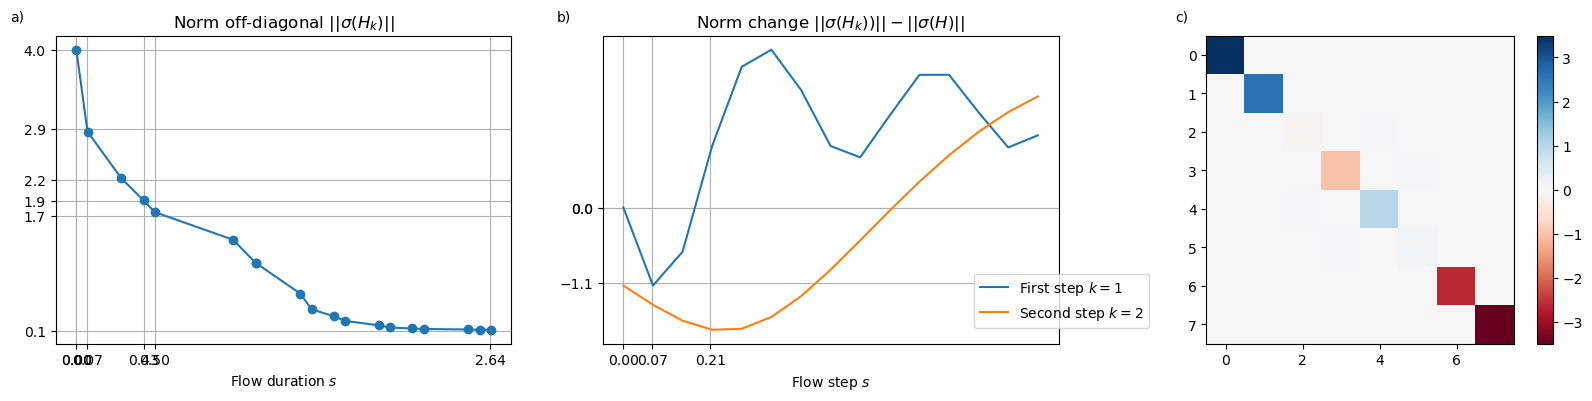

In [32]:
flow.show_flow_forwards_results()
flow.initialize_flow_results()

# TLFIM
Compare with Fig 4 notebook

In [31]:
# System size
L = 3

# Create objects of Pauli operators
X = X_class(L)
Y = Y_class(L)
Z = Z_class(L)
S_plus = S_plus_class(L)
S_minus = S_minus_class(L)

# Trivial initialization of the right size matrix
hamiltonian_name = "TLFIM_L_" +str(L)
H_TLFIM = 0*np.eye( 2**L ) 

# 2X1X2 + 2X2X3 + Z1 + X1 + Z2 + X2 + Z3 + X3
for x in range(L-1):
    H_TLFIM = H_TLFIM + 2*X.at(x+1).dot(X.at(x+2)) + Z.at(x+1)+ X.at(x+1)
H_TLFIM = H_TLFIM + X.at(L) + Z.at(L)
    

Flow step  0 using H with norm 10.198039027185569
    Found minimum norm =  7.20737151309124  for s =  0.06666666666666667
Flow step  1 using H with norm 10.198039027185569
For step 1 , the minimum norm found 6.797308167800267 with canonical, step size s =  0.2
Flow step  2 using H with norm 10.198039027185573
For step 2 , the minimum norm found 5.3818112098299355 with canonical, step size s =  0.022222222222222223
Flow step  3 using H with norm 10.19803902718557
For step 3 , the minimum norm found 4.7443209028460425 with canonical, step size s =  0.044444444444444446
Flow step  4 using H with norm 10.198039027185573
For step 4 , the minimum norm found 4.53483967530327 with canonical, step size s =  0.022222222222222223
Flow step  5 using H with norm 10.19803902718557
For step 5 , the minimum norm found 4.492961832919873 with canonical, step size s =  0.022222222222222223
Flow step  6 using H with norm 10.19803902718557
For step 6 , the minimum norm found 4.462685274452054 with canonic

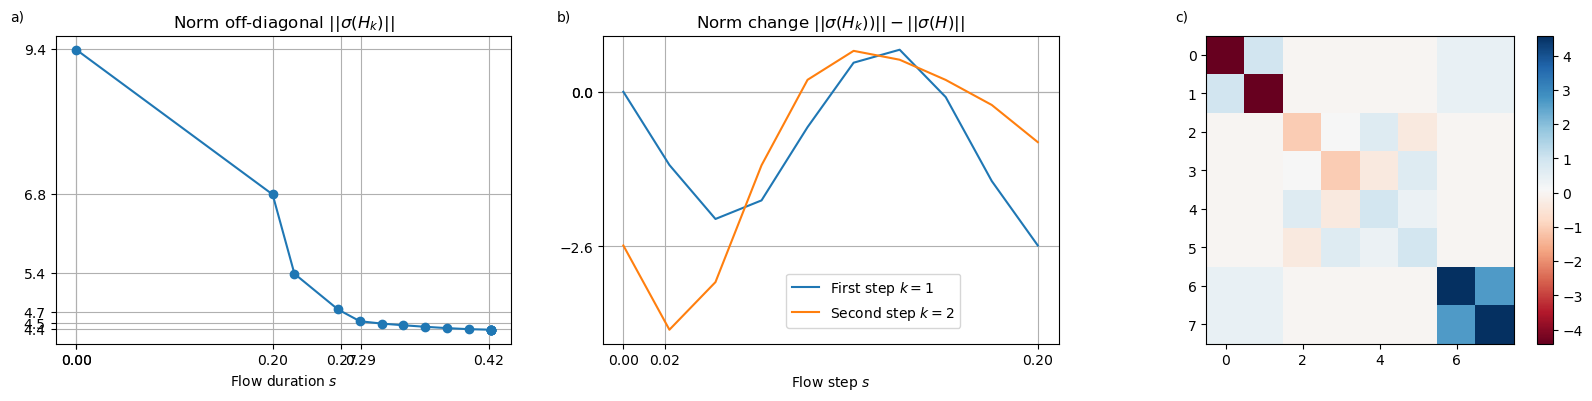

In [39]:
from class_double_bracket_flow import *


flow = double_bracket_flow( H_TLFIM )

flow.please_be_exhaustively_verbose = False
flow.please_be_verbose = True

flow.flow_step_max = 0.2
flow.nmb_search_points_minimizing_s_search = 10
flow.please_use_binary_search =  False
flow.please_compute_observables = False


flow.flow_generator['type'] = 'magnetic_field'
flow.flow_generator['onsite_Z_coupling'] = np.asarray([1,1,0])

flow.magnetic_step_min = 0
flow.magnetic_step_max = 0.1
flow.nmb_search_points_magnetic_b_search = 10
flow.nmb_flow_steps = 15

flow.flow_via_onsite_Z_potential_search()
flow.show_flow_forwards_results()

# Z decomposition

In [33]:
from class_ising_model import *
A = Pauli_algebra(3)
full_decomp_list = A.Pauli_decomposition(H_TLFIM)

In [34]:
Z_decomposition = A.select_onsite_Z_components(full_decomp_list)
Z_decomposition

{(0, 3, 0): 1.0, (3, 0, 0): 1.0}